#### 1. Предсказание баллов ЕГЭ (регрессия) 
#### https://www.kaggle.com/c/tutors-expected-math-exam-results/overview

Ваша задача этом соревновании - предсказать средний балл на экзамене по математике, который получают ученики репетиторов из датасета test.csv. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

Метрика для оценки – Коэффициент детерминации:

$$R^2=1−\frac{σ^2}{σ^2_y}$$

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn import model_selection

### Загрузка данных

In [114]:
PATH_TRAIN_DS = 'regression_data/train.csv'
PATH_TEST_DS = 'regression_data/test.csv'

In [115]:
df = pd.read_csv(PATH_TRAIN_DS)
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [116]:
p_X = ['age', 'years_of_experience', 'lesson_price', 'qualification', 'physics', 'chemistry', 'biology', 'english', 
     'geography', 'history']
p_y = 'mean_exam_points'

p_Xy = p_X + [p_y]

In [117]:
df_test = pd.read_csv(PATH_TEST_DS)
df_test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,10000,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,10001,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10002,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10003,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,10004,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


### Анализ

In [118]:
df.shape

(10000, 12)

In [119]:
df_test.shape

(10000, 11)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [121]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 859.5 KB


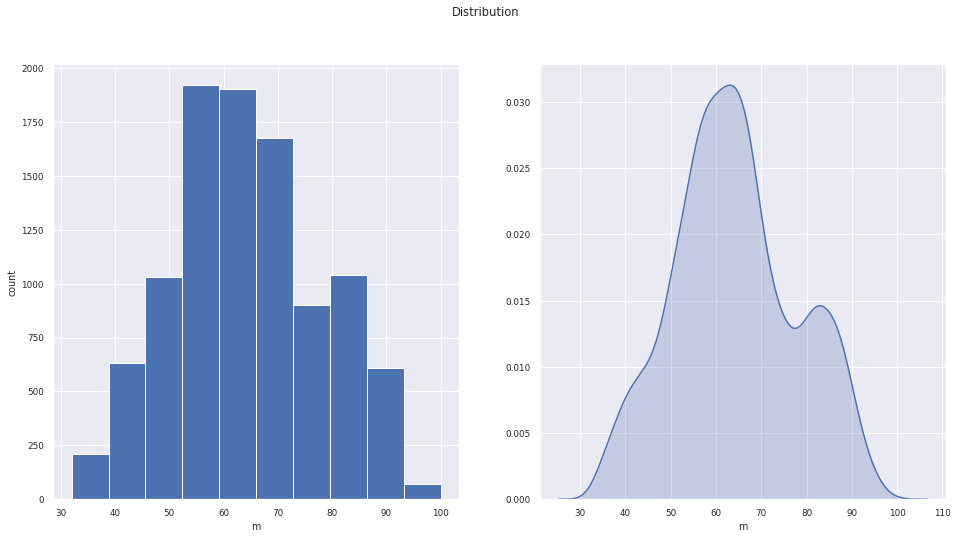

In [122]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df[p_y].hist()
plt.ylabel('count')
plt.xlabel(p_y[0])

plt.subplot(122)
sns.kdeplot(df[p_y], shade=True, legend=False)
plt.xlabel(p_y[0])

plt.suptitle('Distribution')
plt.show()

In [123]:
target_mean = df[p_y].mean()
target_median = df[p_y].median()
target_mode = df[p_y].mode()[0]

target_mean, target_median, target_mode

(64.3408, 63.0, 65.0)

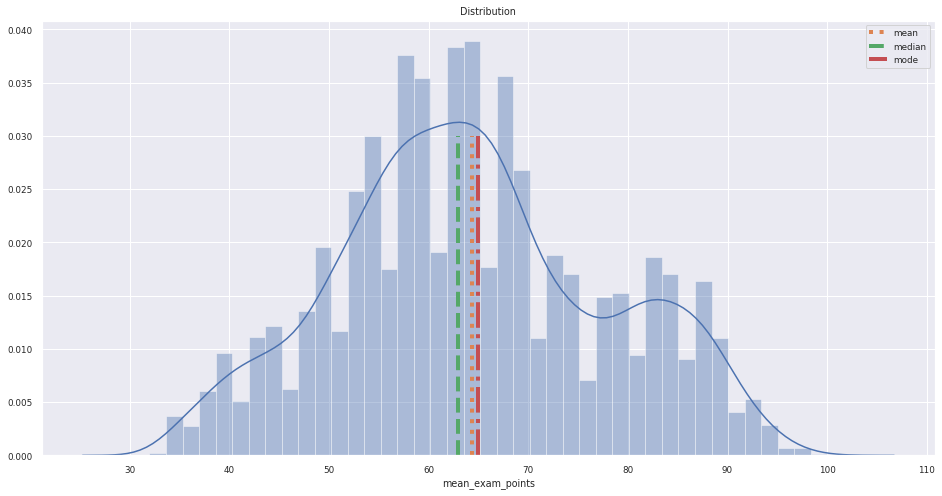

In [124]:
plt.figure(figsize = (16, 8))

sns.distplot(df[p_y])

y_plt = np.linspace(0, 0.03, 100)
plt.plot([target_mean] * 100, y_plt, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y_plt, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y_plt, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution')
plt.legend()
plt.show()

In [125]:
df[p_X].describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400
std,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933
min,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


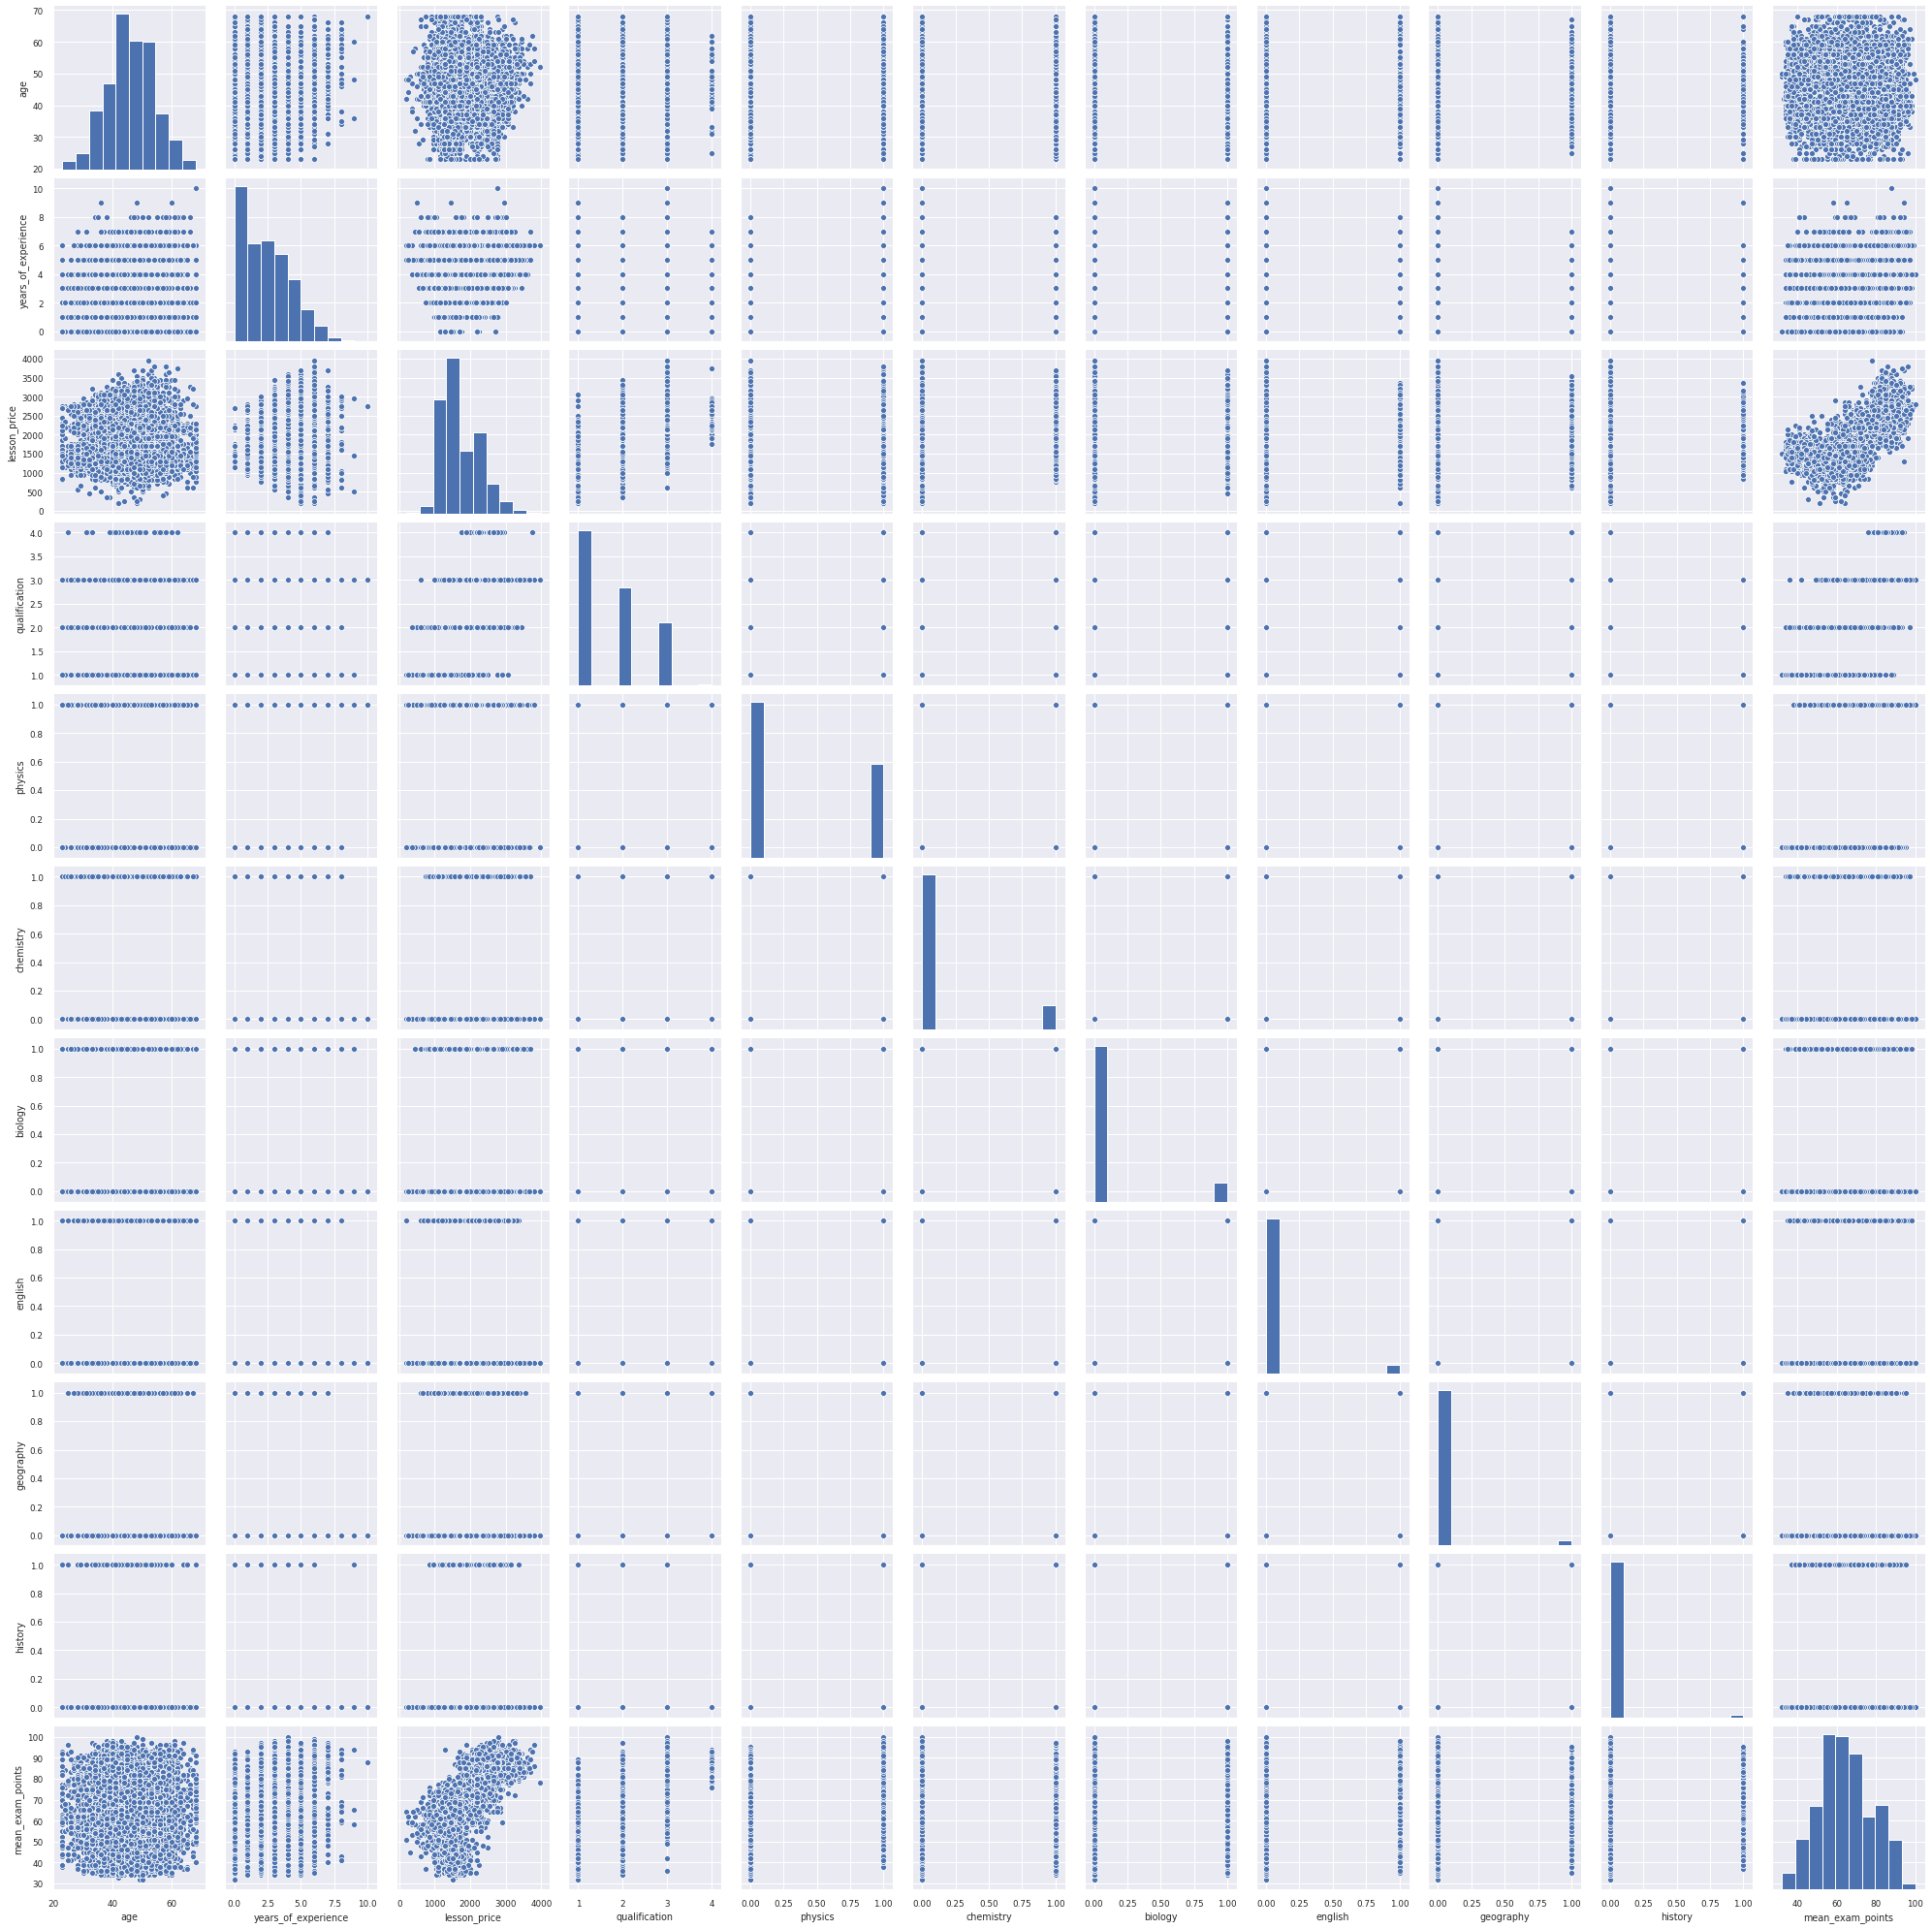

In [126]:
sns.pairplot(df[p_Xy])

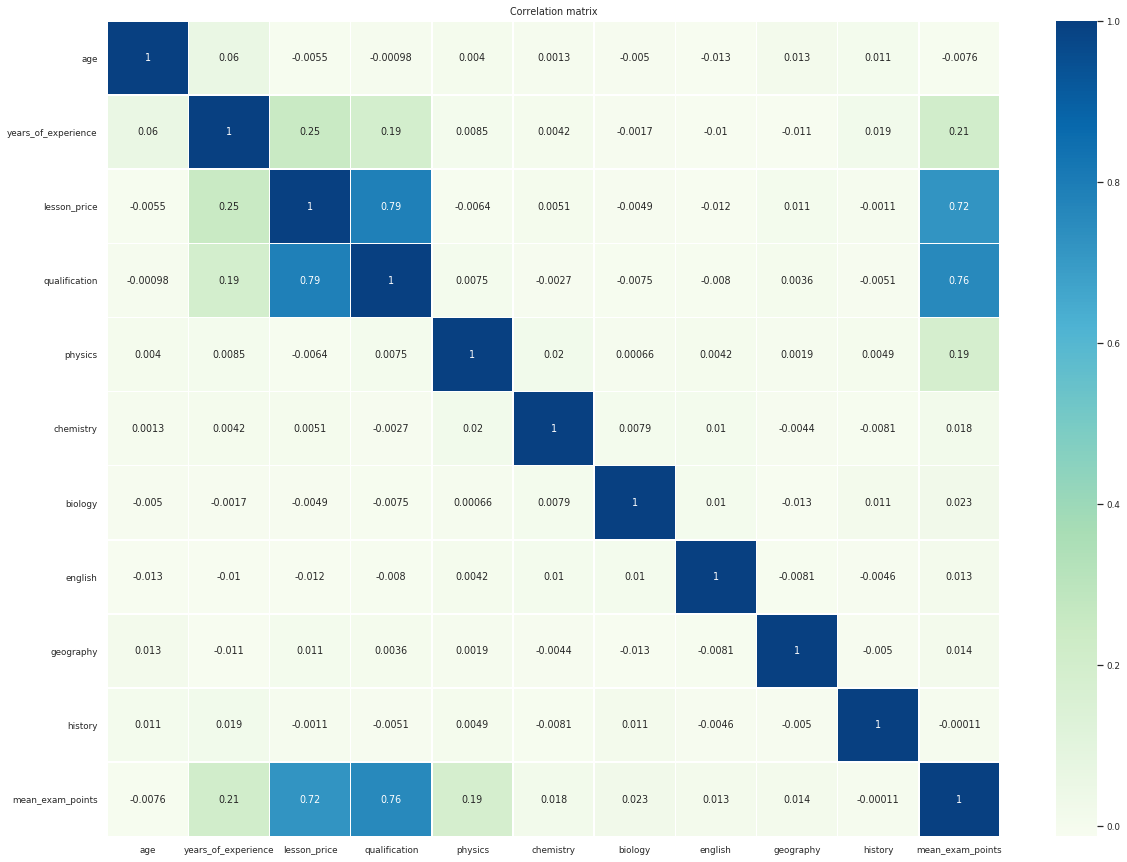

In [127]:
plt.figure(figsize = (20,15))

sns.set(font_scale=0.8)
sns.heatmap(df[p_Xy].corr(), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

## Обучение

In [128]:
def evaluate_preds2(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2_score(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2_score(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

В качестве функционала ошибки будем использовать среднеквадратичную ошибку. Реализуем соответствующую функцию.

In [129]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

Используем $L_{2}$ loss $L(y, z) = (y-z)^{2},$ ее производная по $z$ примет вид $L'(y, z) = 2(z-y)$. Реализуем ее также в виде функции (коэффициент 2 можно отбросить).

In [130]:
def bias(y, z):
    return (y - z)

In [131]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [132]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels  # y_true
        self.prediction = self.predict()  # y_pred
        
    def predict(self):
        return np.mean(self.labels)

In [133]:
# Расчет критерия для регрессии

def get_h(y):
    return np.var(y)

In [134]:
# Расчет качества

def quality(left_labels, right_labels, current_h):

    # доля выборки, ушедшей в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_h - p * get_h(left_labels) - (1 - p) * get_h(right_labels)

In [135]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [137]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    h = get_h(labels)

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        t_values = [row[index] for row in data]
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, h)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [139]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels, max_depth):
    quality, t, index = find_best_split(data, labels)
    # При каждом вызове уменьшаем глубину дерева
    max_depth -= 1

    # Базовый случай
    if quality == 0 or max_depth == 0:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
        
    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels, max_depth)
    false_branch = build_tree(false_data, false_labels, max_depth)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [140]:
# Проход объекта по дереву для его оценки

def predict_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return predict_object(obj, node.true_branch)
    else:
        return predict_object(obj, node.false_branch)

Напишем функцию, реализующую предсказание в градиентном бустинге.

In [141]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * predict_object(x, alg) for alg, 
                          coef in zip(trees_list, coef_list)]) for x in X])

Реализуем функцию обучения градиентного бустинга.

In [142]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, random_state=93):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    target = 0
    
    for i in range(n_trees):
        print(i)
        
        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree(X_train, y_train, max_depth)
            trees.append(tree)
            target = gb_predict(X_train, trees, coefs, eta)
            train_errors.append(mean_squared_error(y_train, target))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree(X_train, bias(y_train, target), max_depth)
            trees.append(tree)
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            train_errors.append(mean_squared_error(y_train, target))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

    return trees, train_errors, test_errors

In [143]:
X = np.array(df[p_X])
y = np.array(df[p_y])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=93)

In [144]:
%%time
m_trees = 250
max_depth = 5
eta = 0.1

pl_train = []
pl_test = []
pl_train_r2 = []
pl_test_r2 = []

coefs = [1] * m_trees
trees, train_errors, test_errors = gb_fit(m_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

train_answers = gb_predict(X_train, trees, coefs, eta)
test_answers = gb_predict(X_test, trees, coefs, eta)
train_accuracy = r2_score(y_train, train_answers)
test_accuracy = r2_score(y_test, test_answers)
print("train_accuracy=", train_accuracy, ", test_accuracy=", test_accuracy)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
train_accuracy= 0.8090562158498461 , test_accuracy= 0.7912294808879474
CPU times: user 2h 52min 52s, sys: 288 

Train R2:	0.809
Test R2:	0.791


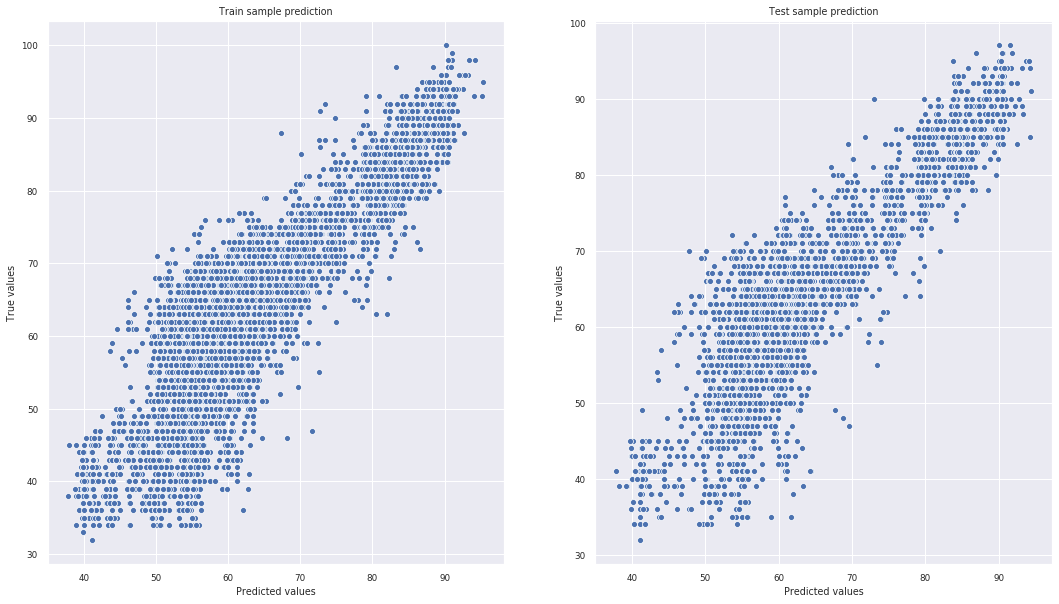

In [145]:
evaluate_preds2(y_train, train_answers, y_test, test_answers)

## Предсказание

In [146]:
y_pred = gb_predict(np.array(df_test[p_X]), trees, coefs, eta)
result = pd.DataFrame({ 'Id': df_test['Id'], 'mean_exam_points': y_pred })
result.head()

,Id,mean_exam_points
0,10000,54.307613
1,10001,63.401797
2,10002,48.256438
3,10003,91.676515
4,10004,89.920717


In [147]:
result.to_csv('RSemenov_predictions_C_GB4.csv', sep=',', index=False, encoding='utf-8')